<a href="https://colab.research.google.com/github/stefcian/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter01/Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]])
y = np.array([[0]])

In [ ]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    print("\nhidden before activation = " + str(pre_hidden))
    hidden = 1/(1+np.exp(-pre_hidden))
    print("hidden after activation = " + str(hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    print("out value = " + str(out))
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            print("\ntemp_weights[" + str(i) + "][" + str(index) + "] = " + str(temp_weights[i][index]) + " before +0.0001 perturbation")
            temp_weights[i][index] += 0.0001
            print("temp_weights[" + str(i) + "][" + str(index) + "] = " + str(temp_weights[i][index]) + " after +0.0001 perturbation")
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            print("loss_plus = " + str(_loss_plus))
            print("loss_original = " + str(original_loss))
            print("grad = " + str(grad))
            print("lr = " + str(lr))
            print("updated_weights[" + str(i) + "][" + str(index) + "] = " + str(updated_weights[i][index]))
    return updated_weights, original_loss

In [ ]:
W = [
    np.array([[-0.8, 0.2],
              [-0.4, -0.9],
              [-0.3, 0.5]], dtype=np.float32).T,
    np.array([-0.1, 0.5, -0.6], dtype=np.float32),
    np.array([[ 0.3, 0.5, 0.9]], dtype=np.float32).T,
    np.array([-0.5], dtype=np.float32)
]

temp_weights[0][(0, 0)] = -0.8 before +0.0001 perturbation
temp_weights[0][(0, 0)] = -0.7999 after +0.0001 perturbation
loss_plus = 0.013396713851896433
loss_original = 0.0133951738962888
grad = 0.01539955607633009
lr = 0.01
updated_weights[0][(0, 0)] = -0.80015403
temp_weights[0][(0, 1)] = -0.4 before +0.0001 perturbation
temp_weights[0][(0, 1)] = -0.39990002 after +0.0001 perturbation
loss_plus = 0.013397649468498411
loss_original = 0.0133951738962888
grad = 0.024755722096113375
lr = 0.01
updated_weights[0][(0, 1)] = -0.40024757
temp_weights[0][(0, 2)] = -0.3 before +0.0001 perturbation
temp_weights[0][(0, 2)] = -0.29990003 after +0.0001 perturbation
loss_plus = 0.01340017904482479
loss_original = 0.0133951738962888
grad = 0.05005148535989698
lr = 0.01
updated_weights[0][(0, 2)] = -0.3005005
temp_weights[0][(1, 0)] = 0.2 before +0.0001 perturbation
temp_weights[0][(1, 0)] = 0.2001 after +0.0001 perturbation
loss_plus = 0.013396713622452788
loss_original = 0.0133951738962888
grad = 0.

Text(0.5, 1.0, 'Loss over increasing number of epochs')

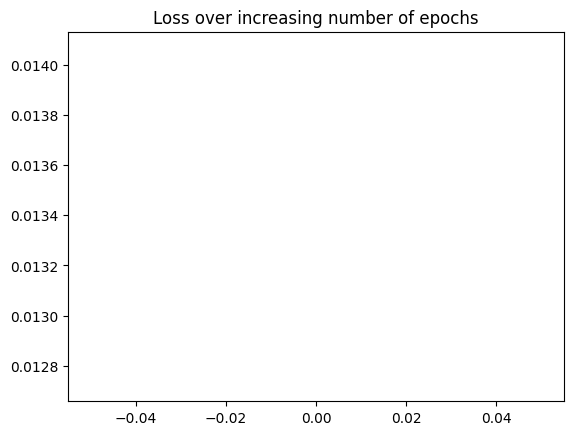

In [ ]:
losses = []
for epoch in range(1):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [ ]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [ ]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden, W[2]) + W[3]

In [ ]:
out

array([[-0.0174781]])